## ADTA
### Team Project 7

### Analysis and Results of the Data

In [1]:
import pandas as pd
import numpy as np
data=pd.read_excel('final project data 1.xlsx')
print("The dataset is")
data

The dataset is


,Record,Sale_amount,Sale_date,Beds,Baths,Sqft_home,Sqft_lot,Type,Build_year,Town,University
0,1,295000,2016-05-31,5,3.00,2020,38332.8,Single Family,1976,"Ames, IA",Iowa State University
1,2,240000,2016-06-20,4,2.00,1498,54014.4,Single Family,2002,"Ames, IA",Iowa State University
2,3,385000,2016-05-31,5,4.00,4000,85813.2,Single Family,2001,"Ames, IA",Iowa State University
3,4,268000,2016-04-12,3,2.50,2283,118918.8,Single Family,1972,"Ames, IA",Iowa State University
4,5,186000,2016-04-05,3,1.25,1527,15681.6,Single Family,1975,"Ames, IA",Iowa State University
...,...,...,...,...,...,...,...,...,...,...,...
10654,10655,320000,2016-06-07,3,2.00,1870,13068.0,Single Family,2012,"Waterloo-Cedar Falls, IA",University of Northern Iowa
10655,10656,359100,2016-04-08,5,4.50,2119,11325.6,Single Family,2013,"Waterloo-Cedar Falls, IA",University of Northern Iowa
10656,10657,349646,2016-06-13,3,1.75,1949,14374.8,Single Family,2015,"Waterloo-Cedar Falls, IA",University of Northern Iowa
10657,10658,288000,2016-04-16,4,4.00,2710,10890.0,Single Family,2012,"Waterloo-Cedar Falls, IA",University of Northern Iowa


### Comparing the relationships between the features of the data

Rows

In [2]:
N=len(data)
print("The total number of entries (rows) in the dataset: ",N)

The total number of entries (rows) in the dataset:  10659


Columns

In [3]:
print("The total number of features (columns) in the dataset: ", data.shape[1])

The total number of features (columns) in the dataset:  11


In [4]:
print("The features in the dataset are")
for column in data.columns:
    print(column)


The features in the dataset are
Record
Sale_amount
Sale_date
Beds
Baths
Sqft_home
Sqft_lot
Type
Build_year
Town
University


Generally, the dependent variable in the dataset is 'Sale Amount' (Sale_amount). All the other features are independent variables which affect the feature 'Sale Amount'.


Although these are the main classes of data, we can even compare the dependencies and relationships amoung these variables

### Analysis 1:

Dependent variable: Sale_amount

In [5]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

Regression test

Independent Variable: Beds, Baths, Sqft_home, Sqft_lot

In [6]:
X = data[['Beds', 'Baths', 'Sqft_home','Sqft_lot']]
X = sm.add_constant(X)

Dependent Variable: Sale amount

In [7]:
Y = data['Sale_amount']

Model declaration and fitting the data in the model:
Ordinary Least Squares (OLS)

In [8]:
model = sm.OLS(Y, X)
results = model.fit()

Dependency of Sale amount on these taken columns

In [9]:
params = results.params
for i, feature_name in enumerate(X.columns):
    print(f"Dependency of Sqft_home on {feature_name}: {params.iloc[i]}")

Dependency of Sqft_home on const: -24677.43009404655
Dependency of Sqft_home on Beds: 8221.253640829527
Dependency of Sqft_home on Baths: 88637.2395934763
Dependency of Sqft_home on Sqft_home: 58.91108786635807
Dependency of Sqft_home on Sqft_lot: 0.19431253275355348


Summary of Regression

In [10]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Sale_amount   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     1136.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        08:00:02   Log-Likelihood:            -1.4903e+05
No. Observations:               10659   AIC:                         2.981e+05
Df Residuals:                   10654   BIC:                         2.981e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.468e+04   9897.363     -2.493      0.0

Regression Metrics

In [11]:
metrics_table = pd.DataFrame(columns=['Metric', 'Value'])

metrics_table = pd.concat([
    metrics_table,
    pd.DataFrame({'Metric': ['R-squared (R2)', 'Adjusted R-squared', 'Mean Squared Error (MSE)',
                             'Root Mean Squared Error (RMSE)', 'F-statistic', 'F-statistic p-value',
                             'Akaike Information Criterion (AIC)', 'Bayesian Information Criterion (BIC)'],
                  'Value': [results.rsquared, results.rsquared_adj, results.mse_resid,
                            np.sqrt(results.mse_resid), results.fvalue, results.f_pvalue,
                            results.aic, results.bic]})
], ignore_index=True)

print(metrics_table)

                                 Metric         Value
0                        R-squared (R2)  2.990142e-01
1                    Adjusted R-squared  2.987510e-01
2              Mean Squared Error (MSE)  8.168600e+10
3        Root Mean Squared Error (RMSE)  2.858076e+05
4                           F-statistic  1.136149e+03
5                   F-statistic p-value  0.000000e+00
6    Akaike Information Criterion (AIC)  2.980735e+05
7  Bayesian Information Criterion (BIC)  2.981099e+05


C:\Users\Sasha\AppData\Local\Temp\ipykernel_14920\2518820042.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_table = pd.concat([


Regression plot

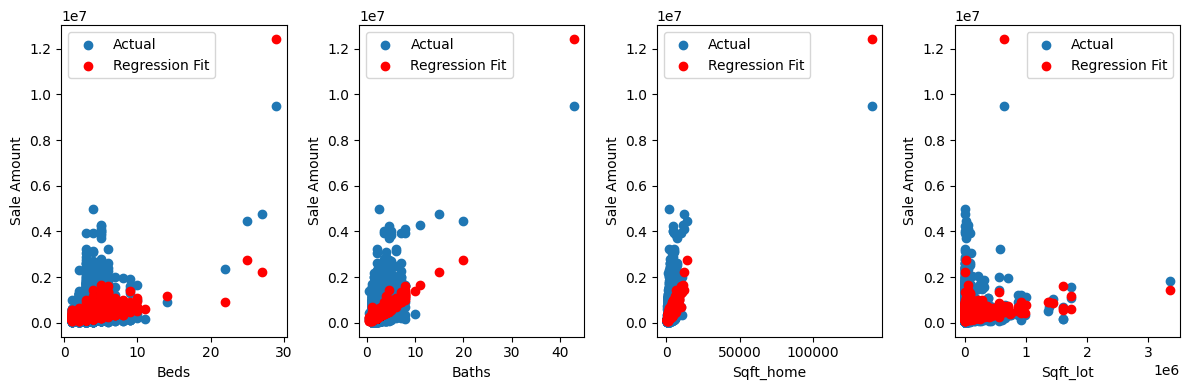

In [12]:
import matplotlib.pyplot as plt
Y_p = results.predict(X)

fig, axes = plt.subplots(nrows=1, ncols=len(X.columns)-1, figsize=(12, 4))

for i, var in enumerate(X.columns[1:]):
    axes[i].scatter(X[var], Y, label='Actual')
    axes[i].scatter(X[var], Y_p, color='red', label='Regression Fit')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Sale Amount')
    axes[i].legend()

plt.tight_layout()
plt.show()

CI

In [15]:
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd

# Assuming X is your design matrix and y is your response variable
model = sm.OLS(Y, X).fit()

# Extract coefficients and standard errors
coefs = model.params
se = model.bse

# Determine degrees of freedom
df = model.df_resid

# Find critical t-value for 95% confidence interval
t_value = stats.t.ppf(0.975, df)

# Calculate confidence intervals
ci_lower = coefs - t_value * se
ci_upper = coefs + t_value * se

# Display results
print("Coefficient Estimates:")
print(coefs)
print("\nConfidence Intervals:")
print(pd.DataFrame({'Lower CI': ci_lower, 'Upper CI': ci_upper}))


Coefficient Estimates:
const       -24677.430094
Beds          8221.253641
Baths        88637.239593
Sqft_home       58.911088
Sqft_lot         0.194313
dtype: float64

Confidence Intervals:
               Lower CI      Upper CI
const     -44078.108496  -5276.751692
Beds        1496.004763  14946.502519
Baths      80620.422542  96654.056645
Sqft_home     54.126553     63.695623
Sqft_lot       0.118954      0.269671


### Analysis 2:

Dependent variable: Sale Amount

Independent variable: Family Type

ANOVA Analysis

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


formula = "Sale_amount ~ Type "

model = ols(formula, data=data).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print("ANOVA results:")
print(anova_table)


ANOVA results:
                sum_sq       df          F        PR(>F)
Type      8.190524e+12      2.0  35.383389  4.830480e-16
Residual  1.233322e+15  10656.0        NaN           NaN


Correlation co-efficient

In [ ]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(data['Beds'], data['Baths'])

print("Correlation coefficient:", corr)
print("P-value:", p_value)

Correlation coefficient: 0.6177614756153998
P-value: 0.0


### Analysis 3:

Dependent variable: Sale_amount

Independent variable: Build_year

Regression test

Independent Variable

In [ ]:
X = data[['Build_year']]
X = sm.add_constant(X)

Dependent Variable

In [ ]:
Y = data['Sqft_home']

Model declaration and fitting the data in the model:
Ordinary Least Squares (OLS)

In [ ]:
model = sm.OLS(Y, X)
results = model.fit()

Dependency of Sale amount on these taken columns

In [ ]:
params = results.params
for i, feature_name in enumerate(X.columns):
    print(f"Dependency of Sqft_home on {feature_name}: {params.iloc[i]}")

Dependency of Sqft_home on const: -12512.294200326276
Dependency of Sqft_home on Build_year: 7.410093068844551


Summary of Regression

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Sqft_home   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     229.1
Date:                Sat, 21 Oct 2023   Prob (F-statistic):           3.26e-51
Time:                        16:37:55   Log-Likelihood:                -94097.
No. Observations:               10659   AIC:                         1.882e+05
Df Residuals:                   10657   BIC:                         1.882e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.251e+04    963.823    -12.982      0.0

Regression Metrics

In [ ]:
metrics_table = pd.DataFrame(columns=['Metric', 'Value'])

metrics_table = pd.concat([
    metrics_table,
    pd.DataFrame({'Metric': ['R-squared (R2)', 'Adjusted R-squared', 'Mean Squared Error (MSE)',
                             'Root Mean Squared Error (RMSE)', 'F-statistic', 'F-statistic p-value',
                             'Akaike Information Criterion (AIC)', 'Bayesian Information Criterion (BIC)'],
                  'Value': [results.rsquared, results.rsquared_adj, results.mse_resid,
                            np.sqrt(results.mse_resid), results.fvalue, results.f_pvalue,
                            results.aic, results.bic]})
], ignore_index=True)

print(metrics_table)

                                 Metric         Value
0                        R-squared (R2)  2.104116e-02
1                    Adjusted R-squared  2.094930e-02
2              Mean Squared Error (MSE)  2.725771e+06
3        Root Mean Squared Error (RMSE)  1.650991e+03
4                           F-statistic  2.290552e+02
5                   F-statistic p-value  3.258293e-51
6    Akaike Information Criterion (AIC)  1.881988e+05
7  Bayesian Information Criterion (BIC)  1.882133e+05


C:\Users\Sasha\AppData\Local\Temp\ipykernel_1448\2518820042.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_table = pd.concat([


Regression plot

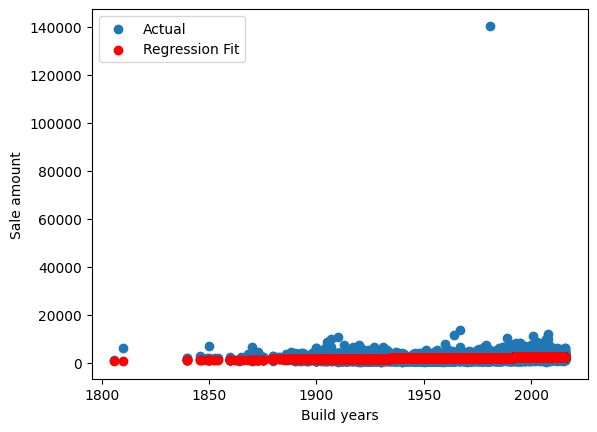

In [ ]:
Y_pred = results.predict(X)

fig, ax = plt.subplots()
ax.scatter(data['Build_year'], Y, label='Actual')
ax.scatter(data['Build_year'], Y_pred, color='red', label='Regression Fit')
ax.set_xlabel('Build years')
ax.set_ylabel('Sale amount')
ax.legend()
plt.show()

#### Machine Learning and Prediction

In [ ]:
data

,Record,Sale_amount,Sale_date,Beds,Baths,Sqft_home,Sqft_lot,Type,Build_year,Town,University
0,1,295000,2016-05-31,5,3.00,2020,38332.8,Single Family,1976,"Ames, IA",Iowa State University
1,2,240000,2016-06-20,4,2.00,1498,54014.4,Single Family,2002,"Ames, IA",Iowa State University
2,3,385000,2016-05-31,5,4.00,4000,85813.2,Single Family,2001,"Ames, IA",Iowa State University
3,4,268000,2016-04-12,3,2.50,2283,118918.8,Single Family,1972,"Ames, IA",Iowa State University
4,5,186000,2016-04-05,3,1.25,1527,15681.6,Single Family,1975,"Ames, IA",Iowa State University
...,...,...,...,...,...,...,...,...,...,...,...
10654,10655,320000,2016-06-07,3,2.00,1870,13068.0,Single Family,2012,"Waterloo-Cedar Falls, IA",University of Northern Iowa
10655,10656,359100,2016-04-08,5,4.50,2119,11325.6,Single Family,2013,"Waterloo-Cedar Falls, IA",University of Northern Iowa
10656,10657,349646,2016-06-13,3,1.75,1949,14374.8,Single Family,2015,"Waterloo-Cedar Falls, IA",University of Northern Iowa
10657,10658,288000,2016-04-16,4,4.00,2710,10890.0,Single Family,2012,"Waterloo-Cedar Falls, IA",University of Northern Iowa


Independent variables

In [ ]:
X=data[['Beds', 'Baths', 'Sqft_home', 'Sqft_lot', 'Build_year']]

Dependent variable

In [ ]:
Y=data['Sale_amount']

Splitting the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Fitting the data to the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor  
RFR = RandomForestRegressor()
RFR.fit(X_train, Y_train)

RandomForestRegressor()

Prediction

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
Y_pred = RFR.predict(X_test)

Model performance metrics

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 150241.65823217636
Mean Squared Error: 77715326040.4339
R-squared: 0.44577430399887397


Using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression 
LR = LinearRegression()
LR.fit(X_train, Y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
Y_pred_lr = LR.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred_lr)
mse = mean_squared_error(Y_test, Y_pred_lr)
r2 = r2_score(Y_test, Y_pred_lr)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 157879.44659877854
Mean Squared Error: 134357075598.14862
R-squared: 0.04183450639687902


Using Ridge Regression

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
from sklearn.linear_model import Lasso
L = Lasso()
L.fit(X_train, Y_train)

Lasso()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
Y_pred_l = L.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred_l)
mse = mean_squared_error(Y_test, Y_pred_l)
r2 = r2_score(Y_test, Y_pred_lr)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 157879.1780372395
Mean Squared Error: 134357589621.11568
R-squared: 0.04183450639687902


Including Family Type

In [ ]:
type=data['Type'].values
type=type.tolist()

Encoding the Categorical variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

type_enc = label_encoder.fit_transform(type)

print(type_enc)


[2 2 2 ... 2 2 2]


In [ ]:
data['Type_enc']=type_enc

Updated dataset

In [ ]:
data

,Record,Sale_amount,Sale_date,Beds,Baths,Sqft_home,Sqft_lot,Type,Build_year,Town,University,Type_enc
0,1,295000,2016-05-31,5,3.00,2020,38332.8,Single Family,1976,"Ames, IA",Iowa State University,2
1,2,240000,2016-06-20,4,2.00,1498,54014.4,Single Family,2002,"Ames, IA",Iowa State University,2
2,3,385000,2016-05-31,5,4.00,4000,85813.2,Single Family,2001,"Ames, IA",Iowa State University,2
3,4,268000,2016-04-12,3,2.50,2283,118918.8,Single Family,1972,"Ames, IA",Iowa State University,2
4,5,186000,2016-04-05,3,1.25,1527,15681.6,Single Family,1975,"Ames, IA",Iowa State University,2
...,...,...,...,...,...,...,...,...,...,...,...,...
10654,10655,320000,2016-06-07,3,2.00,1870,13068.0,Single Family,2012,"Waterloo-Cedar Falls, IA",University of Northern Iowa,2
10655,10656,359100,2016-04-08,5,4.50,2119,11325.6,Single Family,2013,"Waterloo-Cedar Falls, IA",University of Northern Iowa,2
10656,10657,349646,2016-06-13,3,1.75,1949,14374.8,Single Family,2015,"Waterloo-Cedar Falls, IA",University of Northern Iowa,2
10657,10658,288000,2016-04-16,4,4.00,2710,10890.0,Single Family,2012,"Waterloo-Cedar Falls, IA",University of Northern Iowa,2


Independent variables

In [ ]:
X=data[['Beds', 'Baths', 'Sqft_home', 'Sqft_lot', 'Build_year', 'Type_enc']]

Dependent variable

In [ ]:
Y=data['Sale_amount']

Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Fitting the data with Family Type to the model

In [ ]:
RFR2=RandomForestRegressor()
RFR2.fit(X_train, Y_train)

RandomForestRegressor()

Prediction

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
Y_pred_type = RFR2.predict(X_test)

Model Performance Metrics

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred_type)
mse = mean_squared_error(Y_test, Y_pred_type)
r2 = r2_score(Y_test, Y_pred_type)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 152292.40284847675
Mean Squared Error: 80542392104.87842
R-squared: 0.4256131242543184


As the performance of the model is better this this output, let us use this trained model for our website.

In [ ]:
import pickle
pickle.dump(RFR2, open("model.pkl", "wb"))